# Tugas Kecil 1 Eksplorasi library Algoritme Pembelajaran pada Jupyter Notebook

### Afrizal Sebastian - 13520120 - K03
### Muhammad Gilang Ramadhan - 13520137 - K03

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.metrics
import pickle
import graphviz 
import numpy as np
from sklearn import tree
import six
import sys
sys.modules['sklearn.externals.six'] = six
from id3 import Id3Estimator
from id3 import export_graphviz, export_text
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Load Dataset

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

### Show dataframe from dataset

In [3]:
df_breast_cancer = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df_breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Split Data

In [4]:
X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=0)

## 2. Learning with diverse algorithms below

## Decision Tree Classifier

### 1. Learning with fit data training method

|--- worst concave points <= 0.14
|   |--- worst area <= 957.45
|   |   |--- worst perimeter <= 107.75
|   |   |   |--- worst fractal dimension <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- worst fractal dimension >  0.06
|   |   |   |   |--- mean concavity <= 0.14
|   |   |   |   |   |--- area error <= 48.98
|   |   |   |   |   |   |--- smoothness error <= 0.00
|   |   |   |   |   |   |   |--- mean texture <= 19.90
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- mean texture >  19.90
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- smoothness error >  0.00
|   |   |   |   |   |   |   |--- worst texture <= 32.83
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- worst texture >  32.83
|   |   |   |   |   |   |   |   |--- worst texture <= 33.81
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- worst texture >  33.81
|   |   |   |   |   |   |   |   |   |--- c

[Text(0.6390086206896551, 0.95, 'X[27] <= 0.142\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(0.4849137931034483, 0.85, 'X[23] <= 957.45\ngini = 0.146\nsamples = 303\nvalue = [24, 279]'),
 Text(0.38362068965517243, 0.75, 'X[22] <= 107.75\ngini = 0.073\nsamples = 288\nvalue = [11, 277]'),
 Text(0.28448275862068967, 0.65, 'X[29] <= 0.055\ngini = 0.036\nsamples = 269\nvalue = [5, 264]'),
 Text(0.25, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.31896551724137934, 0.55, 'X[6] <= 0.141\ngini = 0.029\nsamples = 268\nvalue = [4, 264]'),
 Text(0.22413793103448276, 0.45, 'X[13] <= 48.975\ngini = 0.022\nsamples = 265\nvalue = [3, 262]'),
 Text(0.13793103448275862, 0.35, 'X[14] <= 0.003\ngini = 0.015\nsamples = 262\nvalue = [2, 260]'),
 Text(0.06896551724137931, 0.25, 'X[1] <= 19.9\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.034482758620689655, 0.15, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.10344827586206896, 0.15, 'gini = 0.0\nsamples = 1\nvalue = [1,

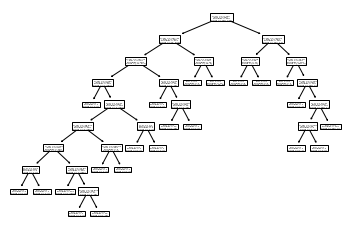

In [5]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(random_state=0)
decision_tree_train = decision_tree.fit(X_train, y_train)
decision_tree_parameter = tree.DecisionTreeClassifier(max_depth=2, random_state=0)
decision_tree_parameter_train = decision_tree_parameter.fit(X_train, y_train)
decision_tree = decision_tree.fit(X_train, y_train)
model = tree.export_text(
    decision_tree_train, feature_names=list(breast_cancer.feature_names))
print(model)
tree.plot_tree(decision_tree)

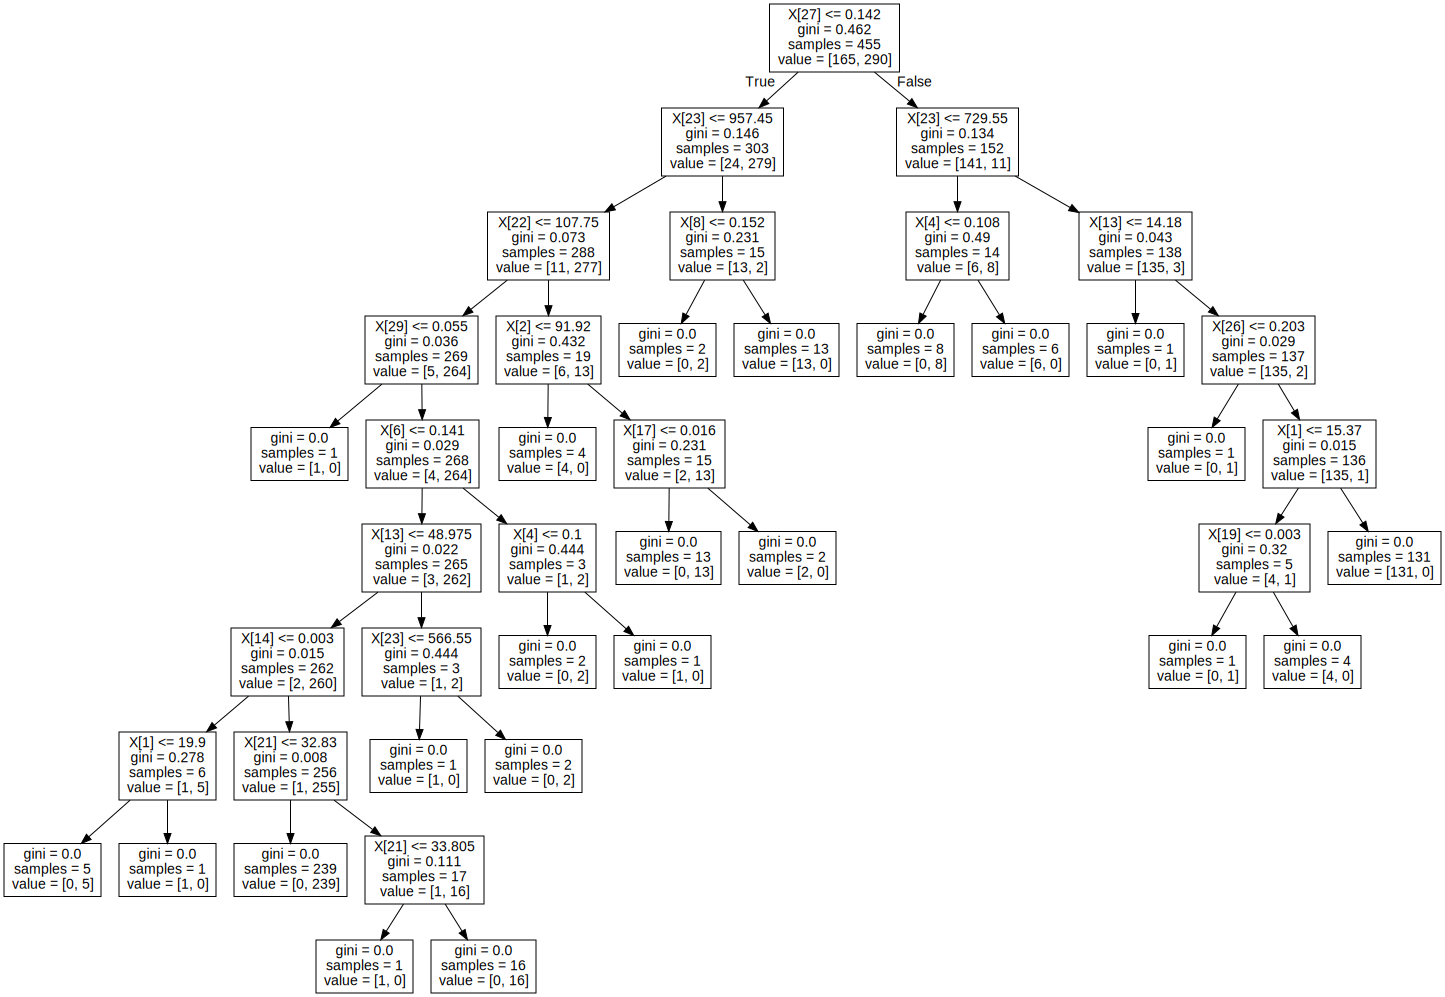

In [6]:
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("Tree_Learning")
graph

### 2. Save Model to Pickle

In [7]:
pickle.dump(decision_tree, open('tree_learning.pkl', 'wb'))

### 3. Load Model from Pickle

In [8]:
decision_tree_learning = pickle.load(open('tree_learning.pkl', 'rb'))
y_pred_tree = decision_tree_learning.predict(X_test)
y_pred_tree

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1])

### 4. Evaluate prediction result with metric analysis: Accuracy, Precision, Recall, F1, Confusion_Matrix

In [9]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, y_pred_tree ))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, y_pred_tree ,average='weighted'))
print("Precision Score\t: %f" %sklearn.metrics.precision_score(y_test, y_pred_tree ,average='weighted'))
print("Recall Score\t: %f" %sklearn.metrics.recall_score(y_test, y_pred_tree ,average='weighted'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, decision_tree_train.predict(X_test)))

Accuracy score	: 0.912281
F1 Score	: 0.912721
Precision Score	: 0.915426
Recall Score	: 0.912281
Confusion matrix dari model: 
 [[44  3]
 [ 7 60]]


Dari hasil diatas diatas dapat dikatakan bahwa model yang dihasilkan dari hasil pembelajaran dengan 80% data breas_cancer sudah baik untuk unseen data atau data test. Hasil yang didapatkan dari martiks diatas sekitar 90% akurasi untuk data test. 
NOTE : Hasil dapat berubah jika program dijalankan ulang dikarenakan split data antara Traning dan Test dilakukan random.

Evaluasi dengan Confusion Matrix

In [10]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, decision_tree_parameter_train.predict(X_test)))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, decision_tree_parameter_train.predict(X_test), average='macro'))
print("Precision Score\t: %f" % sklearn.metrics.precision_score(y_test, decision_tree_parameter_train.predict(X_test), average='macro'))
print("Recall Score\t: %f" % sklearn.metrics.recall_score(y_test, decision_tree_parameter_train.predict(X_test), average='macro'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, decision_tree_parameter_train.predict(X_test)))

Accuracy score	: 0.964912
F1 Score	: 0.963555
Precision Score	: 0.967150
Recall Score	: 0.960622
Confusion matrix dari model: 
 [[44  3]
 [ 1 66]]


Dari hasil diatas diatas dapat dikatakan bahwa model yang dihasilkan dari hasil pembelajaran dengan 80% data breas_cancer menghasilkan 44 True Positif, 3 False Negative, 8 False Positif, dan 59 True Negatif. 
NOTE : Hasil dapat berubah jika program dijalankan ulang dikarenakan split data antara Traning dan Test dilakukan random.

### 5. K-Folds Cross Validation

In [11]:
Kfold = sklearn.model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
scoresAccuracy = sklearn.model_selection.cross_val_score(decision_tree_train, X, y, cv=Kfold, scoring='f1_macro')
print("F1 score dari model: ", scoresAccuracy.mean())
scoresF1 = sklearn.model_selection.cross_val_score(decision_tree_train, X, y, cv=Kfold, scoring='accuracy')
print("Accuracy dari model: ", scoresF1.mean())
print()
print("Perbandingan Accuracy dan F1 pada poin 4: ")
print("Accuracy dari model tanpa menggunakan cross validation: ", sklearn.metrics.accuracy_score(y_test, decision_tree_train.predict(X_test)))
print("F1 score dari model tanpa menggunakan cross validation: ", sklearn.metrics.f1_score(y_test, decision_tree_train.predict(X_test), average='macro'))
print("Accuracy dari model dengan menggunakan cross validation: ", scoresAccuracy.mean())
print("F1 score dari model dengan menggunakan cross validation: ", scoresF1.mean())

F1 score dari model:  0.9136402318193808
Accuracy dari model:  0.9192042606516291

Perbandingan Accuracy dan F1 pada poin 4: 
Accuracy dari model tanpa menggunakan cross validation:  0.9122807017543859
F1 score dari model tanpa menggunakan cross validation:  0.9105180533751962
Accuracy dari model dengan menggunakan cross validation:  0.9136402318193808
F1 score dari model dengan menggunakan cross validation:  0.9192042606516291


### Hasil analisis:
1. Dari segi akurasi:
Berdasarkan hasil di atas, dapat disimpulkan bahwa akurasi dari model Decision Tree Classifier dengan menggunakan cross validation lebih baik jika dibandingkan dengan model Decision Tree Classifier tanpa menggunakan cross validation. Alasannya ialah cross validation akan mempartisi data menjadi beberapa bagian dan setiap bagian tersebut akan dijadikan sebagai data test dan data train. Dengan demikian hal tersebut akan menyebabkan akurasi yang dihasilkan akan lebih baik daripada dengan hanya memakai data train dan data test yang sama.
2. Dari segi F1:
Berdasarkan hasil di atas, dapat disimpulkan bahwa F1 dari model Decision Tree Classifier dengan menggunakan cross validation lebih baik dibandingkan dengan model Decision Tree Classifier tanpa menggunakan cross validation. Alasannya sama dengan pada accuracy di atas.
3. Penggunaan algoritma Decision Tree cukup baik untuk memprediksi penentuan breast cancer pada seseorang. Akurasi yang diperoleh berkisar 91-96%, dimana angka ini termasuk cukup tinggi. Namun yang perlu diperhatikan ialah terdapat perbedaan nilai antara model decision tree yang didefinisikan max_depth-nya dengan yang tidak, yaitu sekitar 5%. Adapun perkiraan dari kelompok kami, hal ini dikarenakan suatu decision tree tidak definisikan max_depth-nya maka secara otomatis ia akan membuat depth sedalam mungkin. Berbeda dengan jika max_depth-nya sudah ditentukan ia akan berhenti melakukan iterasi ketika max_depth-nya tercapai. Hal ini akan menyebabkan ketika dilakukan testing, data tersebut tidak tahu seberagam apa sehingga depth yang dalam dapat membuat "syarat" yang cukup banyak untuk sebuah kasus untuk diklasifikasikan ke kelas apa. Berbeda dengan depth yang tidak terlalu dalam membuat sebuah kasus lebih bebas untuk diklasifikasikan ke kelas apa.

In [12]:
print("Untuk Data Training :")
train_data_score = sklearn.model_selection.cross_val_score(decision_tree_learning, X_train, y_train, cv=10)
print(train_data_score, "\n")

print("Rata-rata : ", np.mean(train_data_score))

Untuk Data Training :
[0.86956522 0.93478261 0.97826087 0.93478261 0.93478261 0.93333333
 0.93333333 0.93333333 0.97777778 0.91111111] 

Rata-rata :  0.9341062801932367


In [13]:
print("Untuk Data Test :")
test_data_score = sklearn.model_selection.cross_val_score(decision_tree_learning, X_test, y_test, cv=10)
print(test_data_score, "\n")

print("Rata-rata : ", np.mean(test_data_score))

Untuk Data Test :
[1.         0.83333333 1.         0.75       0.81818182 0.90909091
 0.90909091 1.         0.81818182 1.        ] 

Rata-rata :  0.9037878787878789


## ID3 Estimator

### 1. Learning with fit data training method

In [14]:
# Data train without additional parameter
id3estimator = Id3Estimator()
id3estimator.fit(X_train, y_train)

# Data train with additional parameter
id3estimator_parameter = Id3Estimator(max_depth=2)
id3estimator_parameter.fit(X_train, y_train)

# Export tree
trees = export_graphviz(id3estimator.tree_, 'tree.dot', list(breast_cancer.feature_names))

### 2. Save Model to Pickle

In [15]:
# Save
with open("modelId3Estimator.pkl", "wb") as f:
    pickle.dump(id3estimator, f)

# Save additonal parameter model
with open("modelId3EstimatorParameter.pkl", "wb") as f:
    pickle.dump(id3estimator_parameter, f)

### 3. Load Model from Pickle

In [16]:
# load model without additional parameter
with open("modelId3Estimator.pkl", "rb") as f:
    model_load_id3estimator = pickle.load(f)
    
# predict data test without additional parameter
model_load_id3estimator.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0])

In [17]:
# load model with additional parameter
with open("modelId3EstimatorParameter.pkl", "rb") as f:
    model_load_id3_parameter = pickle.load(f)

# predict data test with additional parameter
model_load_id3_parameter.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0])

### 4. Evaluate prediction result with metric analysis: Accuracy, Precision, Recall, F1, Confusion_Matrix

Ide3 Estimator without Additional parameter

In [18]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, id3estimator.predict(X_test)))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, id3estimator.predict(X_test), average='macro'))
print("Precision Score\t: %f" % sklearn.metrics.precision_score(y_test, id3estimator.predict(X_test), average='macro'))
print("Recall Score\t: %f" % sklearn.metrics.recall_score(y_test, id3estimator.predict(X_test), average='macro'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, id3estimator.predict(X_test)))

Accuracy score	: 0.912281
F1 Score	: 0.910038
Precision Score	: 0.908006
Recall Score	: 0.912671
Confusion matrix dari model: 
 [[43  4]
 [ 6 61]]


Ide3 Estimator with additional parameter

In [19]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, id3estimator_parameter.predict(X_test)))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, id3estimator_parameter.predict(X_test), average='macro'))
print("Precision Score\t: %f" % sklearn.metrics.precision_score(y_test, id3estimator_parameter.predict(X_test), average='macro'))
print("Recall Score\t: %f" % sklearn.metrics.recall_score(y_test, id3estimator_parameter.predict(X_test), average='macro'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, id3estimator_parameter.predict(X_test)))

Accuracy score	: 0.921053
F1 Score	: 0.920012
Precision Score	: 0.917593
Recall Score	: 0.929660
Confusion matrix dari model: 
 [[46  1]
 [ 8 59]]


### Hasil analisis:
Sama seperti sebelumnya, algoritma ID3Estimator untuk prediksi di kasus breast cancer ini bekerja cukup baik dengan akurasi sekitar 91-92%. Namun lagi-lagi dengan menambahkan parameter terdapat peningkatan akurasi sekitar 1%. Adapun parameter yang ditambahkan ialah pemakaian gain ration pada penentuan cabang. Seperti yang diketahui bahwa ID3Estimator algorithm menggunakan information gain untuk menentukan percabangannya, hanya saja terdapat kekurangan ketika menemukan properti yang memiliki sparse value yang tinggi, seperti nama, tanggal, etc. Oleh karena itu, penggunaan gain ratio dapat membuat perhitungan ID3Estimator menjadi lebih akurat.

## KMeans

### 1. Learning with fit data training method

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(X_train)
kmeans_parameter = KMeans(n_clusters=2, random_state=0,
                          init="random").fit(X_train)
kmeans.cluster_centers_

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([[1.25435892e+01, 1.84710765e+01, 8.10654958e+01, 4.94026629e+02,
        9.52176771e-02, 9.18022380e-02, 6.34759312e-02, 3.38999207e-02,
        1.78615864e-01, 6.35154108e-02, 3.04216714e-01, 1.21734504e+00,
        2.14452776e+00, 2.38088272e+01, 7.15466289e-03, 2.34836317e-02,
        2.91886618e-02, 1.07052125e-02, 2.07497677e-02, 3.69567224e-03,
        1.40344873e+01, 2.46155807e+01, 9.18348159e+01, 6.17465722e+02,
        1.30527507e-01, 2.24186629e-01, 2.20507244e-01, 9.24612493e-02,
        2.84925779e-01, 8.31315014e-02],
       [1.95421569e+01, 2.15124510e+01, 1.29031373e+02, 1.20682647e+03,
        1.00551275e-01, 1.43174510e-01, 1.70573137e-01, 9.98753922e-02,
        1.88979412e-01, 5.97353922e-02, 7.42742157e-01, 1.18404804e+00,
        5.18106863e+00, 9.73082353e+01, 6.47988235e-03, 3.05298725e-02,
        3.93776471e-02, 1.49034216e-02, 1.97483333e-02, 3.76090196e-03,
        2.39446078e+01, 2.87336275e+01, 1.59623529e+02, 1.79388235e+03,
        1.39144510e-01,

### 2. Save Model to Pickle

In [21]:
pickle.dump(kmeans, open('kMeans_learning.pkl', 'wb'))

pickle.dump(kmeans_parameter, open('kMeans_learning_parameter.pkl', 'wb'))

### 3. Load Model from Pickle

In [22]:
kMeans_learning = pickle.load(open('kMeans_learning.pkl', 'rb'))
y_pred_kMeans = kMeans_learning.predict(X_test)
y_pred_kMeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [23]:
kMeans_learning_parameter = pickle.load(open('kMeans_learning_parameter.pkl', 'rb'))
y_pred_kMeans_parameter = kMeans_learning_parameter.predict(X_test)
y_pred_kMeans_parameter

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

### 4. Evaluate prediction result with metric analysis: Accuracy, Precision, Recall, F1, Confusion_Matrix

KMeans without Additional Parameter

In [24]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, y_pred_kMeans ))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, y_pred_kMeans ,average='weighted'))
print("Precision Score\t: %f" %sklearn.metrics.precision_score(y_test, y_pred_kMeans ,average='weighted'))
print("Recall Score\t: %f" %sklearn.metrics.recall_score(y_test, y_pred_kMeans ,average='weighted'))

Accuracy score	: 0.184211
F1 Score	: 0.128265
Precision Score	: 0.098385
Recall Score	: 0.184211


KMeans with additional parameter

In [25]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, y_pred_kMeans_parameter ))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, y_pred_kMeans_parameter ,average='weighted'))
print("Precision Score\t: %f" %sklearn.metrics.precision_score(y_test, y_pred_kMeans_parameter ,average='weighted'))
print("Recall Score\t: %f" %sklearn.metrics.recall_score(y_test, y_pred_kMeans_parameter ,average='weighted'))

Accuracy score	: 0.184211
F1 Score	: 0.128265
Precision Score	: 0.098385
Recall Score	: 0.184211


Dari hasil diatas diatas dapat dikatakan bahwa model yang dihasilkan dari hasil pembelajaran dengan 80% data breas_cancer tidak cocok untuk unseen data atau data test. Hasil yang didapatkan dari martiks diatas sekitar 20% akurasi untuk data test. Namun, jika dilakukan pemodelan lagi pada KMeans ada kemungkinan evaluasi matriks yang dihasilkan 80%. Dikarenakan pemilihan centroid pada KMeans dilakukan secara random.
NOTE : Hasil dapat berubah jika program dijalankan ulang dikarenakan split data antara Traning dan Test dilakukan random.

KMeans without Additional Parameter

In [26]:
print("Confusion Matrix :")
sklearn.metrics.confusion_matrix(y_test, y_pred_kMeans )

Confusion Matrix :


array([[21, 26],
       [67,  0]], dtype=int64)

KMeans with additional parameter

In [27]:
print("Confusion Matrix :")
sklearn.metrics.confusion_matrix(y_test, y_pred_kMeans_parameter )

Confusion Matrix :


array([[21, 26],
       [67,  0]], dtype=int64)

Dari hasil diatas diatas dapat dikatakan bahwa model yang dihasilkan dari hasil pembelajaran dengan 80% data breas_cancer menghasilkan 26 True Positif, 21 False Negative, 0 False Positif, dan 67 True Negatif
NOTE : Hasil dapat berubah jika program dijalankan ulang dikarenakan split data antara Traning dan Test dilakukan random.

## Logistic Regression

### 1. Learning with fit data training method

In [28]:
# Data training without additional parameter
logistic_regression = sklearn.linear_model.LogisticRegression(random_state=0, max_iter=10000)
logistic_regression.fit(X_train, y_train)

# Data training with additional parameter
logistic_regression_parameter = sklearn.linear_model.LogisticRegression(random_state=0, max_iter=10000, solver='liblinear')
logistic_regression_parameter.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0, solver='liblinear')

### 2. Save Model to Pickle

In [29]:
# save model without additional parameter
with open("modelLogisticRegression.pkl", "wb") as f:
    pickle.dump(logistic_regression, f)

# save model with additional parameter
with open("modelLogisticRegressionParameter.pkl", "wb") as f:
    pickle.dump(logistic_regression_parameter, f)

### 3. Load Model from Pickle

In [30]:
# load model
with open("modelLogisticRegression.pkl", "rb") as f:
    model_load_logreg = pickle.load(f)

# predict data test dari load model
model_load_logreg.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [31]:
# load model with additional parameter
with open("modelLogisticRegressionParameter.pkl", "rb") as f:
    model_load_logistic_regression_parameter = pickle.load(f)

# predict data test with additional parameter
model_load_logistic_regression_parameter.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

### 4. Evaluate prediction result with metric analysis: Accuracy, Precision, Recall, F1, Confusion_Matrix

Logistic Regression without Additional parameter

In [32]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, logistic_regression.predict(X_test)))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, logistic_regression.predict(X_test), average='macro'))
print("Precision Score\t: %f" % sklearn.metrics.precision_score(y_test, logistic_regression.predict(X_test), average='macro'))
print("Recall Score\t: %f" % sklearn.metrics.recall_score(y_test, logistic_regression.predict(X_test), average='macro'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, logistic_regression.predict(X_test)))

Accuracy score	: 0.947368
F1 Score	: 0.946311
Precision Score	: 0.943044
Recall Score	: 0.952048
Confusion matrix dari model: 
 [[46  1]
 [ 5 62]]


Logistic Regression with Additional parameter 

In [33]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, logistic_regression_parameter.predict(X_test)))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, logistic_regression_parameter.predict(X_test), average='macro'))
print("Precision Score\t: %f" % sklearn.metrics.precision_score(y_test, logistic_regression_parameter.predict(X_test), average='macro'))
print("Recall Score\t: %f" % sklearn.metrics.recall_score(y_test, logistic_regression_parameter.predict(X_test), average='macro'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, logistic_regression_parameter.predict(X_test)))

Accuracy score	: 0.956140
F1 Score	: 0.955143
Precision Score	: 0.952187
Recall Score	: 0.959511
Confusion matrix dari model: 
 [[46  1]
 [ 4 63]]


### Analisis - Logistic Regression
Algoritma kali ini bekerja dengan cukup baik dengan akurasi mencapai 94-95%. Perbedaan tersebut dapat dilihat terjadi karena adanya perbedaan paramter solver pada logistic regression. Peningkatan kecil itu didapatkan ketika menggunakan solver "liblinear", hal ini dikarenakan solver default untuk algoritma ini adalah "lbfgs" dan solver tersebut ternyata baik digunakan untuk multiclass problem. Sedangkan "libliniear" lebih optimal digunakan untuk dataset dengan ukuran yang tidak terlalu besar.

## Neural Network

### 1. Learning with fit data training method

In [34]:
from sklearn.neural_network import MLPClassifier

neural_network = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
neural_network.fit(X_train, y_train)
neural_network_parameter = MLPClassifier(max_iter=300, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
neural_network_parameter.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=300,
              random_state=1, solver='lbfgs')

### 2. Save Model to Pickle

In [35]:
pickle.dump(neural_network, open('neural_network_learning.pkl', 'wb'))
pickle.dump(neural_network_parameter, open('neural_network_learning_parameter.pkl', 'wb'))

### 3. Load Model from Pickle

In [36]:
neural_network_learning = pickle.load(open('neural_network_learning.pkl', 'rb'))
y_pred_neural_network = neural_network_learning.predict(X_test)
y_pred_neural_network

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1])

In [37]:
neural_network_learning_parameter = pickle.load(open('neural_network_learning_parameter.pkl', 'rb'))
y_pred_neural_network_parameter = neural_network_learning_parameter.predict(X_test)
y_pred_neural_network_parameter

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1])

### 4. Evaluate prediction result with metric analysis: Accuracy, Precision, Recall, F1, Confusion_Matrix

### Neural Network without Additional parameter

In [38]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, y_pred_neural_network ))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, y_pred_neural_network ,average='weighted'))
print("Precision Score\t: %f" %sklearn.metrics.precision_score(y_test, y_pred_neural_network ,average='weighted'))
print("Recall Score\t: %f" %sklearn.metrics.recall_score(y_test, y_pred_neural_network ,average='weighted'))

Accuracy score	: 0.912281
F1 Score	: 0.910105
Precision Score	: 0.923673
Recall Score	: 0.912281


### Neural Network with Additional parameter

In [39]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, neural_network_parameter.predict(X_test) ))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, neural_network_parameter.predict(X_test) ,average='weighted'))
print("Precision Score\t: %f" %sklearn.metrics.precision_score(y_test, neural_network_parameter.predict(X_test) ,average='weighted'))
print("Recall Score\t: %f" %sklearn.metrics.recall_score(y_test, neural_network_parameter.predict(X_test) ,average='weighted'))

Accuracy score	: 0.921053
F1 Score	: 0.921171
Precision Score	: 0.921435
Recall Score	: 0.921053


Dari hasil diatas diatas dapat dikatakan bahwa model yang dihasilkan dari hasil pembelajaran dengan 80% data breas_cancer sudah baik untuk unseen data atau data test. Hasil yang didapatkan dari martiks diatas sekitar 90% akurasi untuk data test
NOTE : Hasil dapat berubah jika program dijalankan ulang dikarenakan split data antara Traning dan Test dilakukan random.

### Neural Network without Additional parameter

In [40]:
print("Confusion Matrix :")
sklearn.metrics.confusion_matrix(y_test, y_pred_neural_network )

Confusion Matrix :


array([[37, 10],
       [ 0, 67]], dtype=int64)

### Neural Network with Additional parameter

In [41]:
print("Confusion Matrix :")
sklearn.metrics.confusion_matrix(y_test, neural_network_parameter.predict(X_test))

Confusion Matrix :


array([[43,  4],
       [ 5, 62]], dtype=int64)

Dari hasil diatas diatas dapat dikatakan bahwa model yang dihasilkan dari hasil pembelajaran dengan 80% data breas_cancer menghasilkan 37 True Positif, 10 False Negative, 0 False Positif, dan 67 True Negatif
NOTE : Hasil dapat berubah jika program dijalankan ulang dikarenakan split data antara Traning dan Test dilakukan random.

### Analisis - Neural Network
Dari hasil di atas algoritma neural network untuk prediksi kasus breast cancer bekerja cukup baik dengan akurasi 92%, walaupun turun jika ditambahkan parameter solver dengan nilai "sgd" atau stochastic gradient descent. Adapun solver default yang digunakan dalam algoritma ini ialah "adam" yang berbasis solver "sgd", tetapi solver "adam" telah dioptimasi sehingga dalam melakukan weight optimization dapat bekerja dengan lebih akurat. Hal tersebutlah yang menyebabkan tingkat akurasinya lebih baik jika dibandingkan dengan "sgd" normalnya.

## SVM

### 1. Learning with fit data training method

In [42]:
# Data train without additional parameter
svm_alg = sklearn.svm.SVC(gamma='auto')
svm_alg.fit(X_train, y_train)

# Data train with additional parameter
svm_alg_parameter = sklearn.svm.SVC(gamma='auto', kernel='linear', C=2)
svm_alg_parameter.fit(X_train, y_train)

SVC(C=2, gamma='auto', kernel='linear')

### 2. Save Model to Pickle

In [43]:
# save
with open("modelSVM.pkl", "wb") as f:
    pickle.dump(svm_alg, f)

# Save additonal parameter model
with open("modelSVMParameter.pkl", "wb") as f:
    pickle.dump(svm_alg_parameter, f)

### 3. Load Model from Pickle

In [44]:
# load model without additional parameter
with open("modelSVM.pkl", "rb") as f:
    model_load_svm_alg = pickle.load(f)

# predict data test without additional parameter
model_load_svm_alg.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [45]:
# load model with additional parameter
with open("modelSVMParameter.pkl", "rb") as f:
    model_load_svm_alg_parameter = pickle.load(f)

# predict data test with additional parameter
model_load_svm_alg_parameter.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

### 4. Evaluate prediction result with metric analysis: Accuracy, Precision, Recall, F1, Confusion_Matrix

SVM without Additional parameter

In [46]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, svm_alg.predict(X_test)))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, svm_alg.predict(X_test), average='macro'))
print("Precision Score\t: %f" % sklearn.metrics.precision_score(y_test, svm_alg.predict(X_test), average='macro'))
print("Recall Score\t: %f" % sklearn.metrics.recall_score(y_test, svm_alg.predict(X_test), average='macro'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, svm_alg.predict(X_test)))

Accuracy score	: 0.587719
F1 Score	: 0.370166
Precision Score	: 0.293860
Recall Score	: 0.500000
Confusion matrix dari model: 
 [[ 0 47]
 [ 0 67]]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM with additional parameter

In [47]:
print("Accuracy score\t: %f" % sklearn.metrics.accuracy_score(y_test, svm_alg_parameter.predict(X_test)))
print("F1 Score\t: %f" % sklearn.metrics.f1_score(y_test, svm_alg_parameter.predict(X_test), average='macro'))
print("Precision Score\t: %f" % sklearn.metrics.precision_score(y_test, svm_alg_parameter.predict(X_test), average='macro'))
print("Recall Score\t: %f" % sklearn.metrics.recall_score(y_test, svm_alg_parameter.predict(X_test), average='macro'))
print("Confusion matrix dari model: \n", sklearn.metrics.confusion_matrix(y_test, svm_alg_parameter.predict(X_test)))

Accuracy score	: 0.964912
F1 Score	: 0.964015
Precision Score	: 0.961695
Recall Score	: 0.966974
Confusion matrix dari model: 
 [[46  1]
 [ 3 64]]


### Analisis - SVM
Dari hasil di atas dapat disimpulkan bahwa algoritma SVM bekerja dengan cukup optimal untuk kasus prediksi breast_cancer. Hal tersebut ditunjukkan dengan tingkat akurasinya yang mencapai 92-95%. Dapat diperhatikan bahwa penambahan parameter kernel dapat meningkatkan akurasi. Hal tersebut dipengaruhi dalam proses pra komputasi pada kernel matrix ketika pengoperasian data. Namun, belum diketahui juga bagaimana pengaruh pengelolaan matriks pra komputasi dapat mempengaruhi kenaikan nilai akurasi. 